# BL40A2030 Wireless Communication Networks

## Final work

### Author: Alex Beattie

In [1]:
import sympy as sp
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import queue
import copy
import math
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')



**The goal of the final work is to compute the Transmission Capacity (i.e. the highest achievable Spatial Throughput considering a maximum acceptable outage probability constraint), also considering aspects related to queue stability. The final work will be step-by-step.**

Consider a bipolar network similar to the one presented in weeks 6 and 7, but now considering a slotted-ALOHA-style of medium access. 

- Network density $\lambda>0$
- Path-loss exponent $\alpha>2$
- Rayleigh fading, leading to a constant $\kappa$
- SIR threshold $\beta>0$
- TX-RX distance $d\geq1$
- Slotted Aloha access probability (independent for individual TXs): $p$
- Outage probability = 1 - success probability: $1 - e^{- \kappa p \lambda \pi d^2 \beta^{2/\alpha}} = 1 - P_s$
- Spatial throughput: $p \times \lambda \times  P_s \times \log_2(1+\beta)$
- Maximum acceptable outage probability: $\epsilon$

*Note: When the slotted-ALOHA-style MAC is used, the original Poisson point process is thinned and the process of active transmitters in the networks becomes $p\lambda$ active nodes per square-meter.*

(A)  Plot: $p \times \lambda \times  P_s \times \log_2(1+\beta)$ in terms of the access probability $p$, considering that $P_s = 1-\epsilon$. Assume: $\alpha=4$, $d=1$, $\epsilon = 0.05$ and $\lambda=0.02$.

*Hint: First proceed with the algebraic manipulation of $P_s = 1-\epsilon$ to find the value of $\beta$ as a function of the other variables. Then, you ended up in a new equation.*

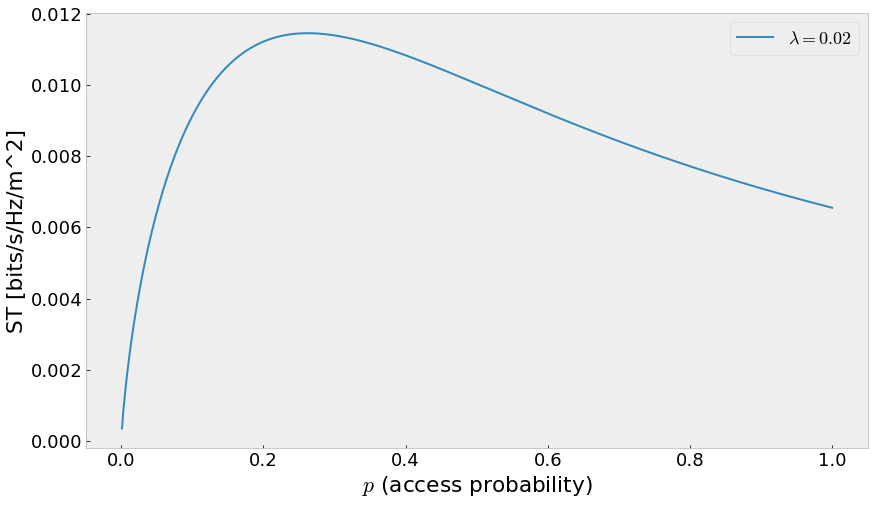

In [15]:
#Path-loss
alpha=4
#lambda
lambda0 = 0.02
#Constant from Rayleigh fading
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
#Access Probability
p = np.linspace(0, 1, 1000)

#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
###########
#distance
d=1

# Epsilon
eps = 0.05

# Success Probability
P_s = 1 - eps
#Spatial Throughput Calc

spat_throughput = p * lambda0 * P_s * np.log2(1+ ((np.log(1 - eps))/(-(kappa * p * lambda0 * np.pi * d**2)))**(alpha/2))
plt.plot(p, spat_throughput , '-' , label=fr'$\lambda={lambda0}$')

plt.xlabel("$p$ (access probability)")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

(B) Find the value of $p$ that optimizes the spatial throughput.


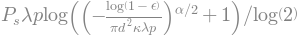

In [3]:
sp.init_printing()

# (1) Defining the variables and functions
d2, lamb2, alpha2, kappa2, p2, ps2, eps2 = sp.symbols('d lambda alpha kappa p P_s epsilon', real = True, positive = True)

beta2 = ((sp.log(1-eps2))/(-(kappa2 * p2 * lamb2 * sp.pi * d2**2)))**(alpha2/2)

# p_s= sp.exp(- kappa2* lamb2 * p2 * sp.pi * d2**2 * beta2**(2/alpha2))


#Success probability
SP = p2 * lamb2 * ps2 * sp.log(1+ beta2, 2)

SP

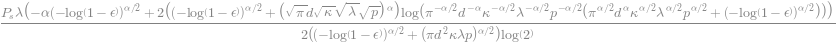

In [4]:
#Checking the derivative -- transcendental equation
IE_dif = sp.simplify(sp.diff(SP,p2))
IE_dif

In [5]:
p_opt_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lambda0).subs(d2,d).subs(ps2,P_s).subs(eps2,eps),p2,0.2)
p_opt_np = sp.lambdify([],p_opt_aux,"numpy")
print(f'Max Value of P: {p_opt_np()}')



Max Value of P: 0.262441050926558


*Hint: It might be possible that sympy cannot find the equation analytically so a numerical solution is also acceptable (see tutorial from week 7).*

(C) Test the result from (B) using the numerical values from (A) by making the plot including the optimal spatial throuhgput value. Verify also for $\lambda=0.01$ and $\lambda=0.025$.

Max Value of P: 0.262441050926558
Max Value of P: 0.524882101853116
Max Value of P: 0.209952840741247


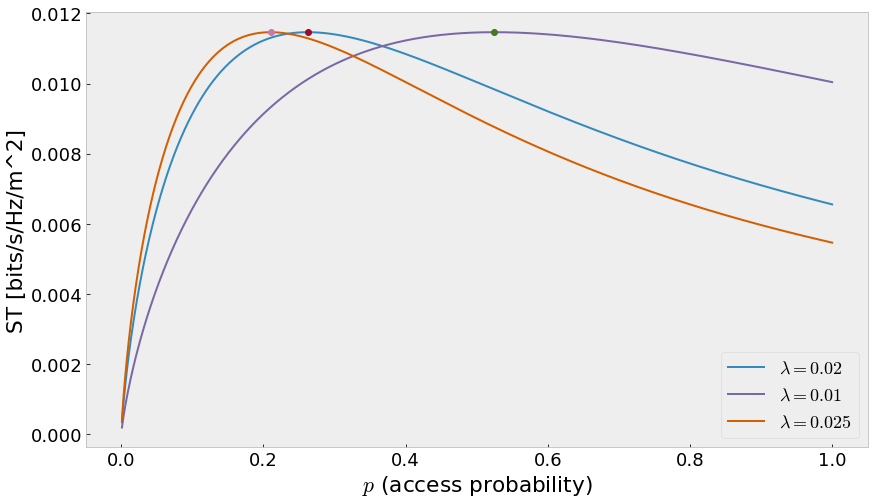

In [6]:
#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
###########
lambda0 = 0.02
p_opt_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lambda0).subs(d2,d).subs(ps2,P_s).subs(eps2,eps),p2,0.2)
p_opt_np = sp.lambdify([],p_opt_aux,"numpy")
print(f'Max Value of P: {p_opt_np()}')
p_part_e = p_opt_np()

plt.plot(p, p * lambda0 * P_s * np.log2(1+ ((np.log(P_s))/(-(kappa * p * lambda0 * np.pi * d**2)))**(alpha/2))  , '-' , label=fr'$\lambda={lambda0}$')
plt.plot(p_opt_np(), p_opt_np() * lambda0 * P_s * np.log2(1+ ((np.log(P_s))/(-(kappa * p_opt_np() * lambda0 * np.pi * d**2)))**(alpha/2)) ,'o')

lambda0 = 0.01
p_opt_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lambda0).subs(d2,d).subs(ps2,P_s).subs(eps2,eps),p2,0.2)
p_opt_np = sp.lambdify([],p_opt_aux,"numpy")
print(f'Max Value of P: {p_opt_np()}')

plt.plot(p, p * lambda0 * P_s * np.log2(1+ ((np.log(P_s))/(-(kappa * p * lambda0 * np.pi * d**2)))**(alpha/2))  , '-' , label=fr'$\lambda={lambda0}$')
plt.plot(p_opt_np(), p_opt_np() * lambda0 * P_s * np.log2(1+ ((np.log(P_s))/(-(kappa * p_opt_np() * lambda0 * np.pi * d**2)))**(alpha/2)) ,'o')

lambda0 = 0.025
p_opt_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lambda0).subs(d2,d).subs(ps2,P_s).subs(eps2,eps),p2,0.2)
p_opt_np = sp.lambdify([],p_opt_aux,"numpy")
print(f'Max Value of P: {p_opt_np()}')

plt.plot(p, p * lambda0 * P_s * np.log2(1+ ((np.log(P_s))/(-(kappa * p * lambda0 * np.pi * d**2)))**(alpha/2))  , '-' , label=fr'$\lambda={lambda0}$')
max_st = p_opt_np() * lambda0 * P_s * np.log2(1+ ((np.log(P_s))/(-(kappa * p_opt_np() * lambda0 * np.pi * d**2)))**(alpha/2))
plt.plot(p_opt_np(), max_st ,'o')


plt.xlabel("$p$ (access probability)")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

(D) What is the transmission capacity of this network (i.e. the maximum achievable spatial throughput)?

In [7]:
max_st

The max achievable spatial throughput of the network is ~0.011 $bits/s/Hz/m^2$. This is indicated by the fact that for each curve with
separate lambda values, there is a horizontal asymptote that the max values all lie on.

(E) Consider that the TXs have one queue where packets arrive at each time slot with a given probability $q$ (Bernoulli arrivals). What is the necessary relation between $p$ and $q$ that guarantees queue stability (i.e. the queue size is not growing to infinity with time). To answer this question you need to simulate this queue considering 3 conditions (i) $q<p$ by setting $q = p - 0.1$, (ii) $q=p$ and (iii) $q>p$ by setting $q = p + 0.1$ for the value of $p$ found in (B) for 10000 time-slots (time-steps) and evaluate the worst case delay.

*Hint: The packets will arrive with probability $q$ each time slot, while packets will leave with probability $p$ (similar to thowning a coin experiment with biased probability). This queue is similar to the "naive" simple queue approach taken in week 1 but now with Bernoulli arrivals and departures. To generate a sequence of Bernoulli, you can use the Binomial random number generator (numpy.random.binomial).*

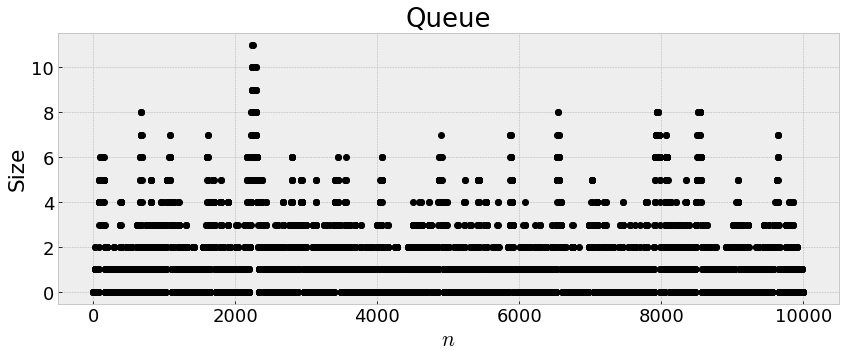

Worst delay: 11.0


In [8]:
### Case 1: Arrivals smaller than service rate

#time periods
size=10000
# Leave Prob From Previous Section
p=p_part_e
#Arrival Prob
q=p-0.1
arrival = np.random.binomial(1, q, size)
#Service
service = np.random.binomial(1, p, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])



plt.figure(figsize=(14,5))
#plt.plot( arrival, 'o',label='Arrival')
#plt.plot( service, 'x',label='Sevice')
plt.plot( queue, 'ok')
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
#plt.ylim([0, 1])
#plt.xlim([0, 10])
plt.grid(True) #grid
plt.show()

print('Worst delay:', np.max(queue))

### Case 2: Arrivals greater than service rate

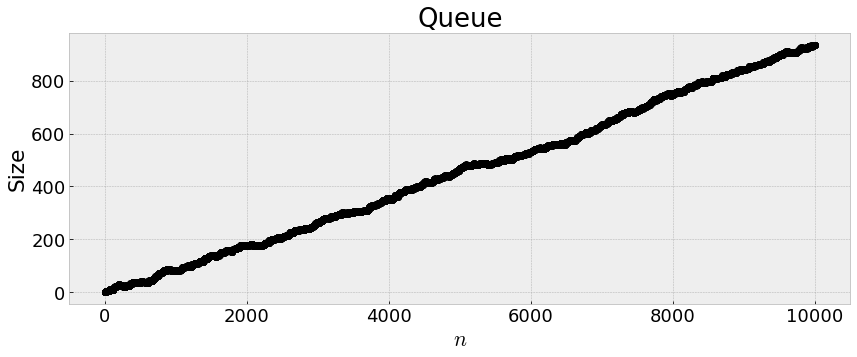

Worst delay: 936.0


In [9]:
#time periods
size=10000
# Leave Prob From Previous Section
p=p_part_e
#Arrival Prob
q=p+0.1
arrival = np.random.binomial(1, q, size)
#Service
service = np.random.binomial(1, p, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])



plt.figure(figsize=(14,5))
#plt.plot( arrival, '--o',label='Arrival')
#plt.plot( service, '-x',label='Sevice')
plt.plot( queue, 'ok')
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
#plt.ylim([0, 1])
#plt.xlim([0, 10])
plt.grid(True) #grid
plt.show()

print('Worst delay:', np.max(queue))

### Case 3: Arrivals equal to service rate

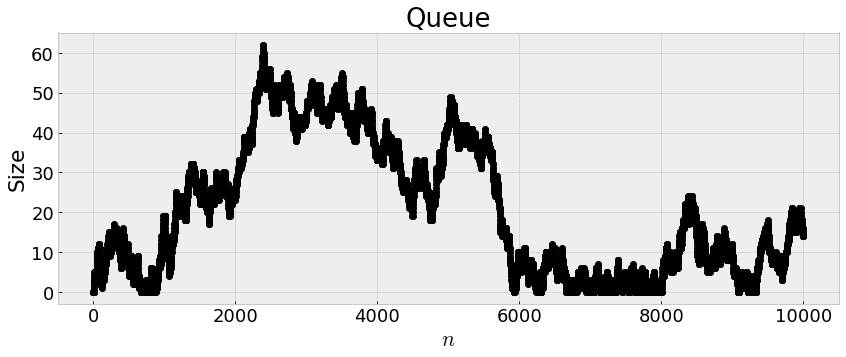

Worst delay: 62.0


In [10]:
#time periods
size=10000
# Leave Prob From Previous Section
p=p_part_e
#Arrival Prob
q=p
arrival = np.random.binomial(1, q, size)
#Service
service = np.random.binomial(1, p, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])



plt.figure(figsize=(14,5))
#plt.plot( arrival, '--o',label='Arrival')
#plt.plot( service, '-x',label='Sevice')
plt.plot( queue, 'ok')
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
#plt.ylim([0, 1])
#plt.xlim([0, 10])
plt.grid(True) #grid
plt.show()

print('Worst delay:', np.max(queue))

These trials have shown that must satisfy p $\geq$ q for the queue not to grow to infinity. In both trials 1 and 3 the queue
did not trend toward infinity whereas in trial 2 where p < q the queue lineally grew toward infinity as the trials progressed.

(F) Write a short comment about what would you expect to happen with the queue of the TXs if:

- Restransmissions are allowed:

If retransmissions are allowed then the queue size will increase compared to the original example. This is because currently failed packets are dropped.
If retransmission is allowed then these packets that are failed will occupy another Tx slot to send which will prevent
other packets from leaving the queue.

- CSMA protocol is used

If CSMA is used without randomization there may be thrashing as multiple packets try to leave the queue at once.
If there is randomization then CSMA will have a potentially higher throughput since it will listen to the medium
to wait to see if anyone is transmitting before beginning its own transmission. This contrasts with the current model
of probabilistically sending or receiving a packet in the queue. The CSMA approach could reduce queue sizes overall if impelmented well.

- Queues have a limited size

If the queues have a limited size then some packets will get dropped if the queue size is greater than the worst queue delay.
For the first example this would be around 10 but for the second example this would stabalize the queue as once the
arrival packets reach the queue limit new packets coming in are dropped. This obviously degrades the service in the network
but prevents the queue from going to infinity. Similarly in the third example a queue size limit smaller than sixty could
cause intermittent packets to be dropped if the arrivals and subsequently queue size begins to grow faster than the departures.


